In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
true_news=pd.read_csv('True.csv')
fake_news=pd.read_csv('Fake.csv')

In [ ]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_news.shape

(21417, 4)

In [ ]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
true_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
true_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
true_news.duplicated().sum()

206

In [ ]:
true_news.drop_duplicates(inplace=True)

In [ ]:
true_news['label']=1

In [ ]:
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake_news.shape

(23481, 4)

In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
fake_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
fake_news.duplicated().sum()

3

In [ ]:
fake_news.drop_duplicates(inplace=True)

In [ ]:
fake_news['label']=0

In [ ]:
df=pd.concat([true_news,fake_news],ignore_index=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<Axes: xlabel='label', ylabel='count'>

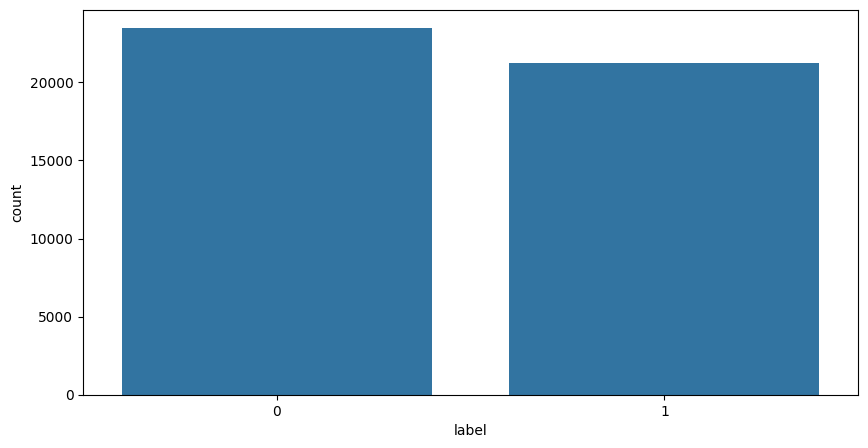

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='label',data=df)

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
def clean_text(text):
    text=re.sub(r'[^a-zA-Z]',' ',text)
    text = re.sub(r'http\S+', '', text)
    text=text.lower()
    tokens=word_tokenize(text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
df['text']=df['text'].apply(clean_text)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
tfidf=TfidfVectorizer(max_features=500)
X=tfidf.fit_transform(df['text']).toarray()
y=df['label']

In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 0.06976614, 0.04072308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02814799, 0.        ,
        0.09511333],
       ...,
       [0.        , 0.01667435, 0.        , ..., 0.04204748, 0.01051863,
        0.02029719],
       [0.        , 0.        , 0.        , ..., 0.03263205, 0.        ,
        0.        ],
       [0.        , 0.14104076, 0.        , ..., 0.02032346, 0.        ,
        0.        ]])

In [ ]:
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
44684,0
44685,0
44686,0
44687,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('\nClassification Report:\n\n',classification_report(y_test,y_pred))

Accuracy: 0.9306332512866413

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.93      0.93      4648
           1       0.93      0.93      0.93      4290

    accuracy                           0.93      8938
   macro avg       0.93      0.93      0.93      8938
weighted avg       0.93      0.93      0.93      8938



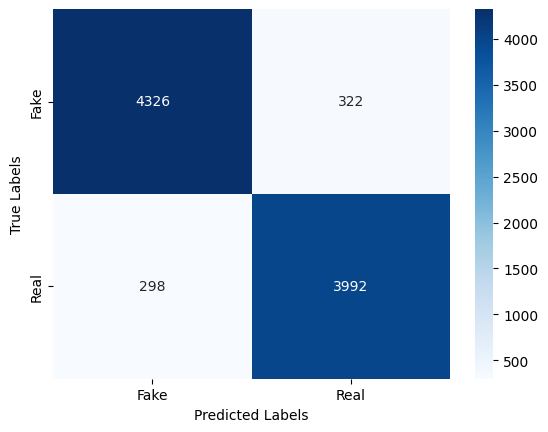

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
fake_log_probs = model.feature_log_prob_[0]
real_log_probs = model.feature_log_prob_[1]
feature_names = tfidf.get_feature_names_out()
top_fake_words = np.argsort(fake_log_probs)[-10:]
print("Top words for Fake News:", [feature_names[i] for i in top_fake_words])
top_real_words = np.argsort(real_log_probs)[-10:]
print("Top words for Real News:", [feature_names[i] for i in top_real_words])


Top words for Fake News: ['american', 'like', 'hillary', 'one', 'said', 'obama', 'president', 'people', 'clinton', 'trump']
Top words for Real News: ['house', 'year', 'republican', 'government', 'would', 'president', 'state', 'reuters', 'trump', 'said']


In [ ]:
def prediction(News):
  clean=clean_text(News)
  vectorized=tfidf.transform([clean]).toarray()
  prediction=model.predict(vectorized)
  if prediction[0]==1:
    print('Real News')
  else:
    print('Fake News')



In [ ]:
Example_news=input('Paste an article, which you want to predict:')
print('Your article:', Example_news)
print('\n')
print('This news is:')
prediction(Example_news)

Paste an article, which you want to predict:NASA’s Perseverance rover has successfully collected its first rock samples from the surface of Mars. The samples, which were taken from the Jezero Crater, are believed to contain signs of ancient microbial life. Scientists hope that analyzing these samples will provide insights into the planet’s geological history and potential for past habitability. The rover is equipped with advanced drilling technology and will store the samples for a future mission to return them to Earth. This marks a significant milestone in NASA’s Mars exploration program
Your article: NASA’s Perseverance rover has successfully collected its first rock samples from the surface of Mars. The samples, which were taken from the Jezero Crater, are believed to contain signs of ancient microbial life. Scientists hope that analyzing these samples will provide insights into the planet’s geological history and potential for past habitability. The rover is equipped with advanced